Bu örneğimizde doğrusal regresyon modeli kurmak için reklam türlerine yapılan harcamalarla satış miktarı arasındaki ilişkiyi inceleyerek satış-reklam ilişkisi arasında ki korelasyona bakacağız Veri İçeriği: TV: TV reklamlarına yapılan harcama (bin  𝑐𝑖𝑛𝑠𝑖𝑛𝑑𝑒𝑛)𝑅𝑎𝑑𝑖𝑜:𝑅𝑎𝑑𝑦𝑜𝑟𝑒𝑘𝑙𝑎𝑚𝑙𝑎𝑟ı𝑛𝑎𝑦𝑎𝑝ı𝑙𝑎𝑛ℎ𝑎𝑟𝑐𝑎𝑚𝑎(𝑏𝑖𝑛
  cinsinden) Newspaper: Gazete reklamlarına yapılan harcama (bin $ cinsinden) Sales: Toplam satış miktarı (bin birim cinsinden)

In [1]:
#Kütüphanemizi ekleyelim ve pandas ile temel incelemeler yapalım
import pandas as pd

In [2]:
#İlk olarak verimizi okutalım
data=pd.read_csv('Advertising.csv')

In [3]:
#İlk 10 satırı alalım
data.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


Veriyi başarıyla yükledik. Veri setinde aşağıdaki sütunlar bulunuyor:

TV: TV reklamlarına yapılan harcama (bin $ cinsinden)
Radio: Radyo reklamlarına yapılan harcama (bin $ cinsinden)
Newspaper: Gazete reklamlarına yapılan harcama (bin $ cinsinden)
Sales: Toplam satış miktarı (bin birim cinsinden)

In [4]:
#İstatiksel özet alalım
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
#Eksik veri kontrolü
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

Doğrusal regresyon modelimiz için Tv,Radio,Newspaper harcamalarını bagımsız degisken olarak alacagız,Sales ise bagımlı olacak

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
#Gereksiz sütunu kaldırdıktan sonra tekrar bakalım
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Unnamed sütununu kaldırdık


In [12]:
#Bağımlı ve bağımsız değişkenlerimizi seçelim
X=data[['TV','Radio','Newspaper']]
y=data['Sales']

In [13]:
#Verilerimizi test-train olarak ayıralım
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
#Doğrusal regresyon modelimizi kuralım
model=LinearRegression()
#Eğitelim
model.fit(X_train,y_train)

LinearRegression()

In [15]:
#Tahmin yapma
y_predic=model.predict(X_test)

In [17]:
#Modelin değerlendirilmesi
mse=mean_squared_error(y_predic,y_test)
r2=r2_score(y_test,y_predic)

mse,r2

(3.1740973539761046, 0.899438024100912)

Mean Squaed Error:3.17-Tahmin edilen satış ile gerçek satış arasındaki ortalama hata miktarı
R2 Skoru:Modelin verinin %89.9 açıkladığını gösteriyor bu da modelin oldukça iy performans ile çalıştığını gösterir

In [18]:
#Test verisinde yapılan tahminlerin ortalaması ve birkaç satırı
y_predic_mean=y_predic.mean()

In [20]:
y_predic[:5],y_predic_mean

(array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326]),
 13.8100211990551)

Modelin test verisi üzerinde tahmin ettiği satış miktarlarının ortalaması 13.81 bin birim. İlk birkaç tahminimiz ise şöyle:

16.41 bin birim
20.89 bin birim
21.55 bin birim
10.61 bin birim
22.11 bin birim

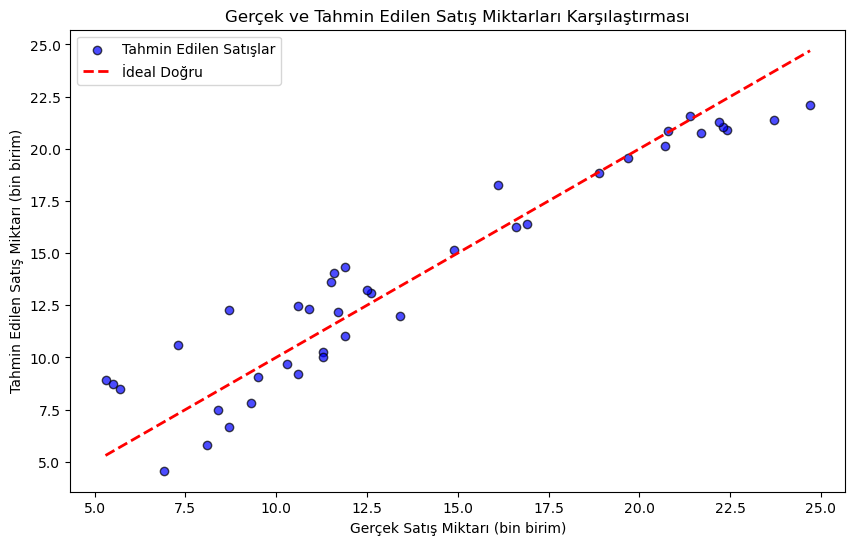

In [22]:
import matplotlib.pyplot as plt

# Gerçek satış değerleri ve tahmin edilen satış değerlerini görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predic, alpha=0.7, color="blue", edgecolor="k", label="Tahmin Edilen Satışlar")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="İdeal Doğru")
plt.xlabel("Gerçek Satış Miktarı (bin birim)")
plt.ylabel("Tahmin Edilen Satış Miktarı (bin birim)")
plt.title("Gerçek ve Tahmin Edilen Satış Miktarları Karşılaştırması")
plt.legend()
plt.show()


Mavi noktalar, modelin test verisi üzerindeki tahminlerini gösteriyor; bu noktalar, gerçek satış miktarları ile tahmin edilen satış miktarları arasındaki ilişkiyi temsil ediyor.
Kırmızı kesikli çizgi, tahminlerin gerçek değerlere birebir eşit olduğu ideal çizgiyi gösteriyor.